In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rew_df = pd.read_csv('BPref_rew.csv')
t_df = pd.read_csv('BPref_t.csv', skiprows=2, names=['r', 'l', 't'])

In [3]:
rew_df

,episode_reward,step,true_episode_reward
0,14.537764,32000,14.537764
1,73.141189,48000,73.141189
2,73.700676,64000,73.700676
3,46.243661,80000,46.243661
4,48.100029,96000,48.100029
...,...,...,...
244,380.896443,3936000,380.896443
245,401.131698,3952000,401.131698
246,392.038470,3968000,392.038470
247,387.304681,3984000,387.304681


In [4]:
t_df

,r,l,t
0,19.276158,1000,48.804488
1,16.438080,1000,81.146470
2,20.601933,1000,106.406032
3,12.370382,1000,125.293463
4,22.312888,1000,145.160473
...,...,...,...
245,398.128430,1000,4452.381841
246,423.704934,1000,4470.490195
247,435.260752,1000,4488.380553
248,393.683813,1000,4506.322491


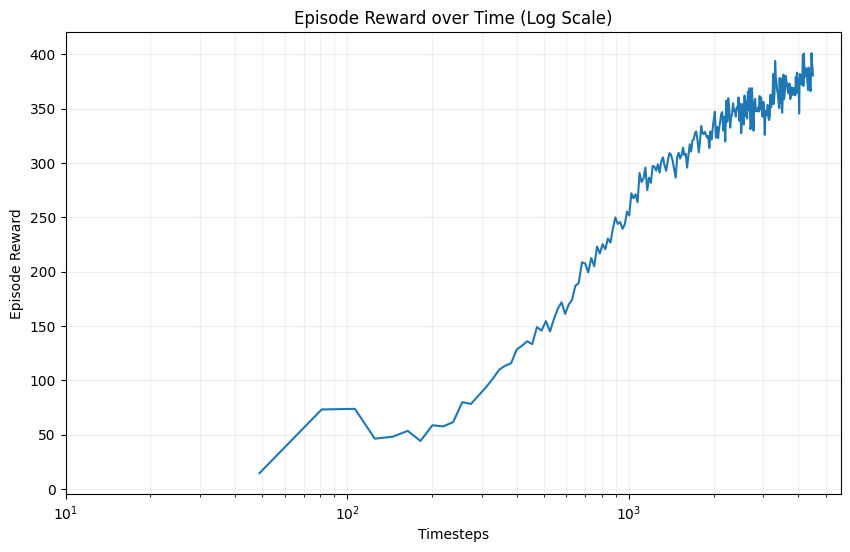

In [9]:
# Create a new dataframe combining the time from monitor and reward from eval
bpref_df = pd.DataFrame({
    't': t_df['t'],
    'episode_reward': rew_df['episode_reward']
})

# Plot the episode reward over time
plt.figure(figsize=(10, 6))
plt.semilogx(bpref_df['t'], combined_df['episode_reward'])
plt.xlabel('Timesteps')
plt.ylabel('Episode Reward')
plt.title('Episode Reward over Time (Log Scale)')

# Set x-axis ticks to powers of 10
plt.xticks([10**i for i in range(1, int(np.log10(combined_df['t'].max()))+1)])

# Add grid for easier reading
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.show()

In [12]:
prefacc_df = pd.read_csv('eval_rewards_and_timesteps.csv')
prefacc_df

,Evaluation Number,Reward,Timestep
0,1,-63.794777,52.586890
1,2,-83.356020,55.368570
2,3,-97.194885,58.178497
3,4,-92.681244,60.940641
4,5,-108.521680,63.711051
5,6,-121.361270,66.481986
6,7,-84.536020,69.253230
7,8,-40.934937,72.112921
8,9,18.639765,74.883553
9,10,108.383720,77.662240


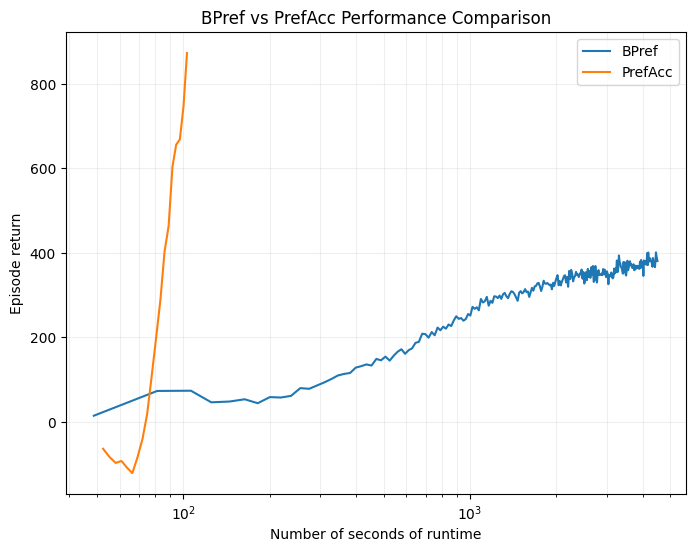

In [16]:
plt.figure(figsize=(8, 6))

# Plot BPref data
plt.plot(bpref_df['t'], bpref_df['episode_reward'], label='BPref')

# Plot prefacc prefppo data
plt.plot(prefacc_df['Timestep'], prefacc_df['Reward'], label='PrefAcc')

plt.xlabel('Number of seconds of runtime')
plt.ylabel('Episode return')
plt.title('BPref vs PrefAcc Performance Comparison')

# Set x-axis to log scale
plt.xscale('log')

# Add grid for easier reading
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add legend
plt.legend()

# Show the plot
plt.show()

# Save the plot
plt.savefig('bpref_vs_prefacc_comparison.png')
plt.close()